In [9]:
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from utils import *
pd.set_option('display.max_columns', 50)

In [10]:
INPUT = "../input"
TRAIN = os.path.join(INPUT, 'train_data.csv')
TEST = os.path.join(INPUT, 'test_data.csv')
FEATURED = os.path.join(INPUT, "feature")

In [11]:
df = read_new_csv()
df_train, df_test = df_split(df)
df.describe()
# yの平均は11.7

../feature/08161044.csv was read


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut,age_bin,campaign_log,all_campaign,campaign_bin,previous_bin,month_day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,40211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2482.530601,40.936210,5.125854,1.513238,2.049944,0.018027,9382.272058,0.555838,0.160226,1.776293,15.806419,6.144655,259.163080,2.763841,40.197828,0.580323,1.357767,0.117182,5.171812,14.675441,9.118653,96.109808,0.113665,2.860786,0.706819,3.344164,2.392692,0.485192,630.271925
std,8298.978937,10.618762,3.271028,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.804435,0.321641,0.921822,6.617814,0.212975,12.049073,0.189765,0.423533,0.712172,3.799297,1.642502,1.273336,241.793983
min,-1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-0.345134,1.000000,0.000000,1.000000,1.000000,0.000000,106.000000
25%,-1.000000,33.000000,2.000000,1.000000,1.000000,0.000000,8092.000000,0.000000,0.000000,1.000000,8.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,4.644391,10.198039,8.998631,89.955545,-0.001369,3.000000,0.000000,1.000000,1.000000,0.000000,509.000000
50%,-1.000000,39.000000,6.000000,1.000000,2.000000,0.000000,8468.000000,1.000000,0.000000,2.000000,16.000000,6.000000,181.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,5.198497,13.453624,9.044050,92.021737,0.043223,3.000000,0.693147,2.000000,2.000000,0.000000,604.000000
75%,-1.000000,48.000000,8.000000,2.000000,2.000000,0.000000,9448.000000,1.000000,0.000000,2.000000,21.000000,8.000000,320.000000,3.000000,-1.000000,0.000000,1.000000,0.000000,5.768321,17.888544,9.153558,97.200823,0.150909,3.000000,1.098612,4.000000,3.000000,0.000000,805.000000
max,45199.000000,95.000000,12.000000,3.000000,4.000000,1.000000,110147.000000,1.000000,1.000000,3.000000,31.000000,12.000000,4919.000000,63.000000,871.000000,275.000000,4.000000,1.000000,8.500861,70.135583,11.609571,331.884016,1.298363,4.000000,4.143135,277.000000,9.000000,9.000000,1231.000000


In [4]:
print("y is yes")
df_train[df_train["y"] == 1].describe()


y is yes


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
count,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,...,4712.000000,4712.000000,4712.000000,4712.000000,4712.0,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000
mean,29536.120968,41.607173,4.971138,1.596774,1.896647,0.009550,9848.588922,0.364601,0.091044,1.974109,...,2.144100,68.097199,1.167657,1.840620,1.0,6.043971,21.891800,9.161240,98.300074,1.161240
std,10550.119798,13.465065,3.463736,0.691070,0.930927,0.097267,3594.772110,0.481369,0.287702,0.413332,...,1.942342,118.346395,2.584819,1.211922,0.0,0.724527,7.839841,0.230065,13.628050,0.230065
min,76.000000,18.000000,1.000000,1.000000,1.000000,0.000000,4962.000000,0.000000,0.000000,1.000000,...,1.000000,-1.000000,0.000000,1.000000,1.0,2.197225,3.000000,8.509564,70.441465,0.509564
25%,23587.750000,31.000000,2.000000,1.000000,1.000000,0.000000,8226.000000,0.000000,0.000000,2.000000,...,1.000000,-1.000000,0.000000,1.000000,1.0,5.501258,15.652476,9.015055,90.697299,1.015055
50%,34200.000000,38.000000,5.000000,1.000000,2.000000,0.000000,8738.500000,0.000000,0.000000,2.000000,...,2.000000,-1.000000,0.000000,1.000000,1.0,6.066108,20.760539,9.075494,93.479944,1.075494
75%,37949.250000,50.000000,8.000000,2.000000,2.000000,0.000000,10186.000000,1.000000,0.000000,2.000000,...,3.000000,98.000000,1.000000,3.000000,1.0,6.591674,27.000000,9.228770,100.925715,1.228770
max,40208.000000,95.000000,12.000000,3.000000,4.000000,1.000000,89224.000000,1.000000,1.000000,3.000000,...,32.000000,854.000000,58.000000,4.000000,1.0,8.264106,62.305698,11.398905,298.703867,3.398905


In [5]:
print("y is no")
df_train[df_train["y"] == 0].describe()

y is no


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
count,35499.000000,35499.000000,35499.000000,35499.000000,35499.000000,35499.000000,35499.000000,35499.000000,35499.000000,35499.000000,...,35499.000000,35499.000000,35499.000000,35499.000000,35499.0,35499.000000,35499.000000,35499.000000,35499.000000,35499.000000
mean,18853.149469,40.842615,5.135863,1.503479,2.069016,0.019099,9328.062143,0.580777,0.168793,1.752810,...,2.835798,36.603933,0.507704,1.294177,0.0,5.056917,13.726261,9.113608,95.852729,1.113608
std,11157.420345,10.180834,3.248977,0.692562,0.971898,0.136875,2980.883743,0.493439,0.374575,0.560345,...,3.217087,96.990074,2.324768,0.708895,0.0,0.882591,5.821928,0.211071,11.845696,0.211071
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,-1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,-8.000000
25%,9193.500000,33.000000,2.000000,1.000000,1.000000,0.000000,8078.000000,0.000000,0.000000,1.000000,...,1.000000,-1.000000,0.000000,1.000000,0.0,4.564348,9.797959,8.996900,89.877695,0.996900
50%,18649.000000,39.000000,6.000000,1.000000,2.000000,0.000000,8439.000000,1.000000,0.000000,2.000000,...,2.000000,-1.000000,0.000000,1.000000,0.0,5.105945,12.845233,9.040619,91.864030,1.040619
75%,28283.500000,48.000000,8.000000,2.000000,2.000000,0.000000,9370.500000,1.000000,0.000000,2.000000,...,3.000000,-1.000000,0.000000,1.000000,0.0,5.631212,16.703293,9.145322,96.801343,1.145322
max,40210.000000,95.000000,12.000000,3.000000,4.000000,1.000000,110147.000000,1.000000,1.000000,3.000000,...,63.000000,871.000000,275.000000,4.000000,0.0,8.500861,70.135583,11.609571,331.884016,3.609571


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 0 to 40210
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40211 non-null  int64  
 1   age              40211 non-null  int64  
 2   job              40211 non-null  int64  
 3   marital          40211 non-null  int64  
 4   education        40211 non-null  int64  
 5   default          40211 non-null  int64  
 6   balance          40211 non-null  int64  
 7   housing          40211 non-null  int64  
 8   loan             40211 non-null  int64  
 9   contact          40211 non-null  int64  
 10  day              40211 non-null  int64  
 11  month            40211 non-null  int64  
 12  duration         40211 non-null  int64  
 13  campaign         40211 non-null  int64  
 14  pdays            40211 non-null  int64  
 15  previous         40211 non-null  int64  
 16  poutcome         40211 non-null  int64  
 17  y           

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 40211 to 45210
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5000 non-null   int64  
 1   ID               5000 non-null   int64  
 2   age              5000 non-null   int64  
 3   job              5000 non-null   int64  
 4   marital          5000 non-null   int64  
 5   education        5000 non-null   int64  
 6   default          5000 non-null   int64  
 7   balance          5000 non-null   int64  
 8   housing          5000 non-null   int64  
 9   loan             5000 non-null   int64  
 10  contact          5000 non-null   int64  
 11  day              5000 non-null   int64  
 12  month            5000 non-null   int64  
 13  duration         5000 non-null   int64  
 14  campaign         5000 non-null   int64  
 15  pdays            5000 non-null   int64  
 16  previous         5000 non-null   int64  
 17  poutcome 

In [25]:
df_train.describe()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
count,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,...,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000
mean,20105.000000,40.932208,5.116560,1.514411,2.048817,0.017980,9389.058442,0.555445,0.159683,1.778742,...,2.754744,40.294372,0.585039,1.358210,0.117182,5.172582,14.683114,9.119190,96.139513,0.114217
std,11608.060174,10.621005,3.275256,0.693028,0.968763,0.132881,3063.726303,0.496923,0.366316,0.549795,...,3.102956,100.240920,2.366232,0.804123,0.321641,0.921942,6.634887,0.213931,12.093639,0.190450
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-0.345134
25%,10052.500000,33.000000,2.000000,1.000000,1.000000,0.000000,8092.000000,0.000000,0.000000,1.000000,...,1.000000,-1.000000,0.000000,1.000000,0.000000,4.644391,10.198039,8.998631,89.955545,-0.001369
50%,20105.000000,39.000000,6.000000,1.000000,2.000000,0.000000,8470.000000,1.000000,0.000000,2.000000,...,2.000000,-1.000000,0.000000,1.000000,0.000000,5.198497,13.453624,9.044286,92.032603,0.043341
75%,30157.500000,48.000000,8.000000,2.000000,2.000000,0.000000,9453.000000,1.000000,0.000000,2.000000,...,3.000000,-1.000000,0.000000,1.000000,0.000000,5.765191,17.860571,9.154087,97.226540,0.151651
max,40210.000000,95.000000,12.000000,3.000000,4.000000,1.000000,110147.000000,1.000000,1.000000,3.000000,...,63.000000,871.000000,275.000000,4.000000,1.000000,8.500861,70.135583,11.609571,331.884016,1.296678


# メモ
- ageとjobは相関がありそう＝＞除くべき？
http://www.housecat442.com/?p=494
- housing, age, job, loanは関わってそう
- ageが結構寄与しているが、他と相関があるからな気がする
- 各種unknown埋めをしたい(job education contact poutcome)

# EDA

## 基本統計量の確認
平均、最大、最小、分散とかをみてみる

In [9]:
df_train.head(10)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
0,0,58,1,1,1,0,10163,1,0,1,...,1,-1,0,1,0.0,5.568345,16.186414,9.226509,100.811706,1.226509
1,1,44,2,2,2,0,8049,1,0,1,...,1,-1,0,1,0.0,5.023881,12.328828,8.993303,89.716219,0.993303
2,2,33,3,1,2,0,8022,1,1,1,...,1,-1,0,1,0.0,4.343805,8.774964,8.989943,89.565618,0.989943
3,3,33,4,2,3,0,8021,0,0,1,...,1,-1,0,1,0.0,5.293305,14.106736,8.989818,89.560036,0.989818
4,4,35,1,1,1,0,8251,1,0,1,...,1,-1,0,1,0.0,4.941642,11.832160,9.018090,90.835015,1.018090
5,5,28,1,2,1,0,8467,1,1,1,...,1,-1,0,1,0.0,5.384495,14.764823,9.043932,92.016303,1.043932
6,6,42,3,3,1,1,8022,1,0,1,...,1,-1,0,1,0.0,5.942799,19.519221,8.989943,89.565618,0.989943
7,7,58,5,1,4,0,8141,1,0,1,...,1,-1,0,1,0.0,3.931826,7.141428,9.004668,90.227490,1.004668
8,8,43,2,2,2,0,8613,1,0,1,...,1,-1,0,1,0.0,4.025352,7.483315,9.061028,92.806250,1.061028
9,9,41,6,3,2,0,8290,1,0,1,...,1,-1,0,1,0.0,5.407172,14.933185,9.022805,91.049437,1.022805


In [10]:
df_test.head(10)

,Unnamed: 0,ID,age,job,marital,education,default,balance,housing,loan,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
40211,0,4,47,8,1,3,0,9526,1,0,...,1,-1,0,1,NaN,4.532599,9.643651,9.161780,97.601230,1.161780
40212,1,19,60,5,1,4,0,8080,1,0,...,1,-1,0,1,NaN,5.393628,14.832397,8.997147,89.888820,0.997147
40213,2,25,40,5,1,4,0,8020,1,1,...,1,-1,0,1,NaN,5.204007,13.490738,8.989694,89.554453,0.989694
40214,3,29,46,1,2,2,0,7774,1,0,...,2,-1,0,1,NaN,5.545177,16.000000,8.958540,88.170290,0.958540
40215,4,35,51,1,1,1,0,18655,1,0,...,1,-1,0,1,NaN,5.820083,18.357560,9.833869,136.583308,1.833869
40216,5,51,54,8,1,2,0,9311,1,0,...,1,-1,0,1,NaN,5.587249,16.340135,9.138952,96.493523,1.138952
40217,6,75,43,2,1,2,0,9957,1,0,...,1,-1,0,1,NaN,5.204007,13.490738,9.206031,99.784768,1.206031
40218,7,85,46,9,1,1,0,8157,1,1,...,1,-1,0,1,NaN,5.509388,15.716234,9.006632,90.316112,1.006632
40219,8,90,57,5,1,2,0,8506,1,0,...,2,-1,0,1,NaN,5.198497,13.453624,9.048527,92.227978,1.048527
40220,9,92,30,2,1,2,0,8172,1,1,...,2,-1,0,1,NaN,5.365976,14.628739,9.008469,90.399115,1.008469


<AxesSubplot:>

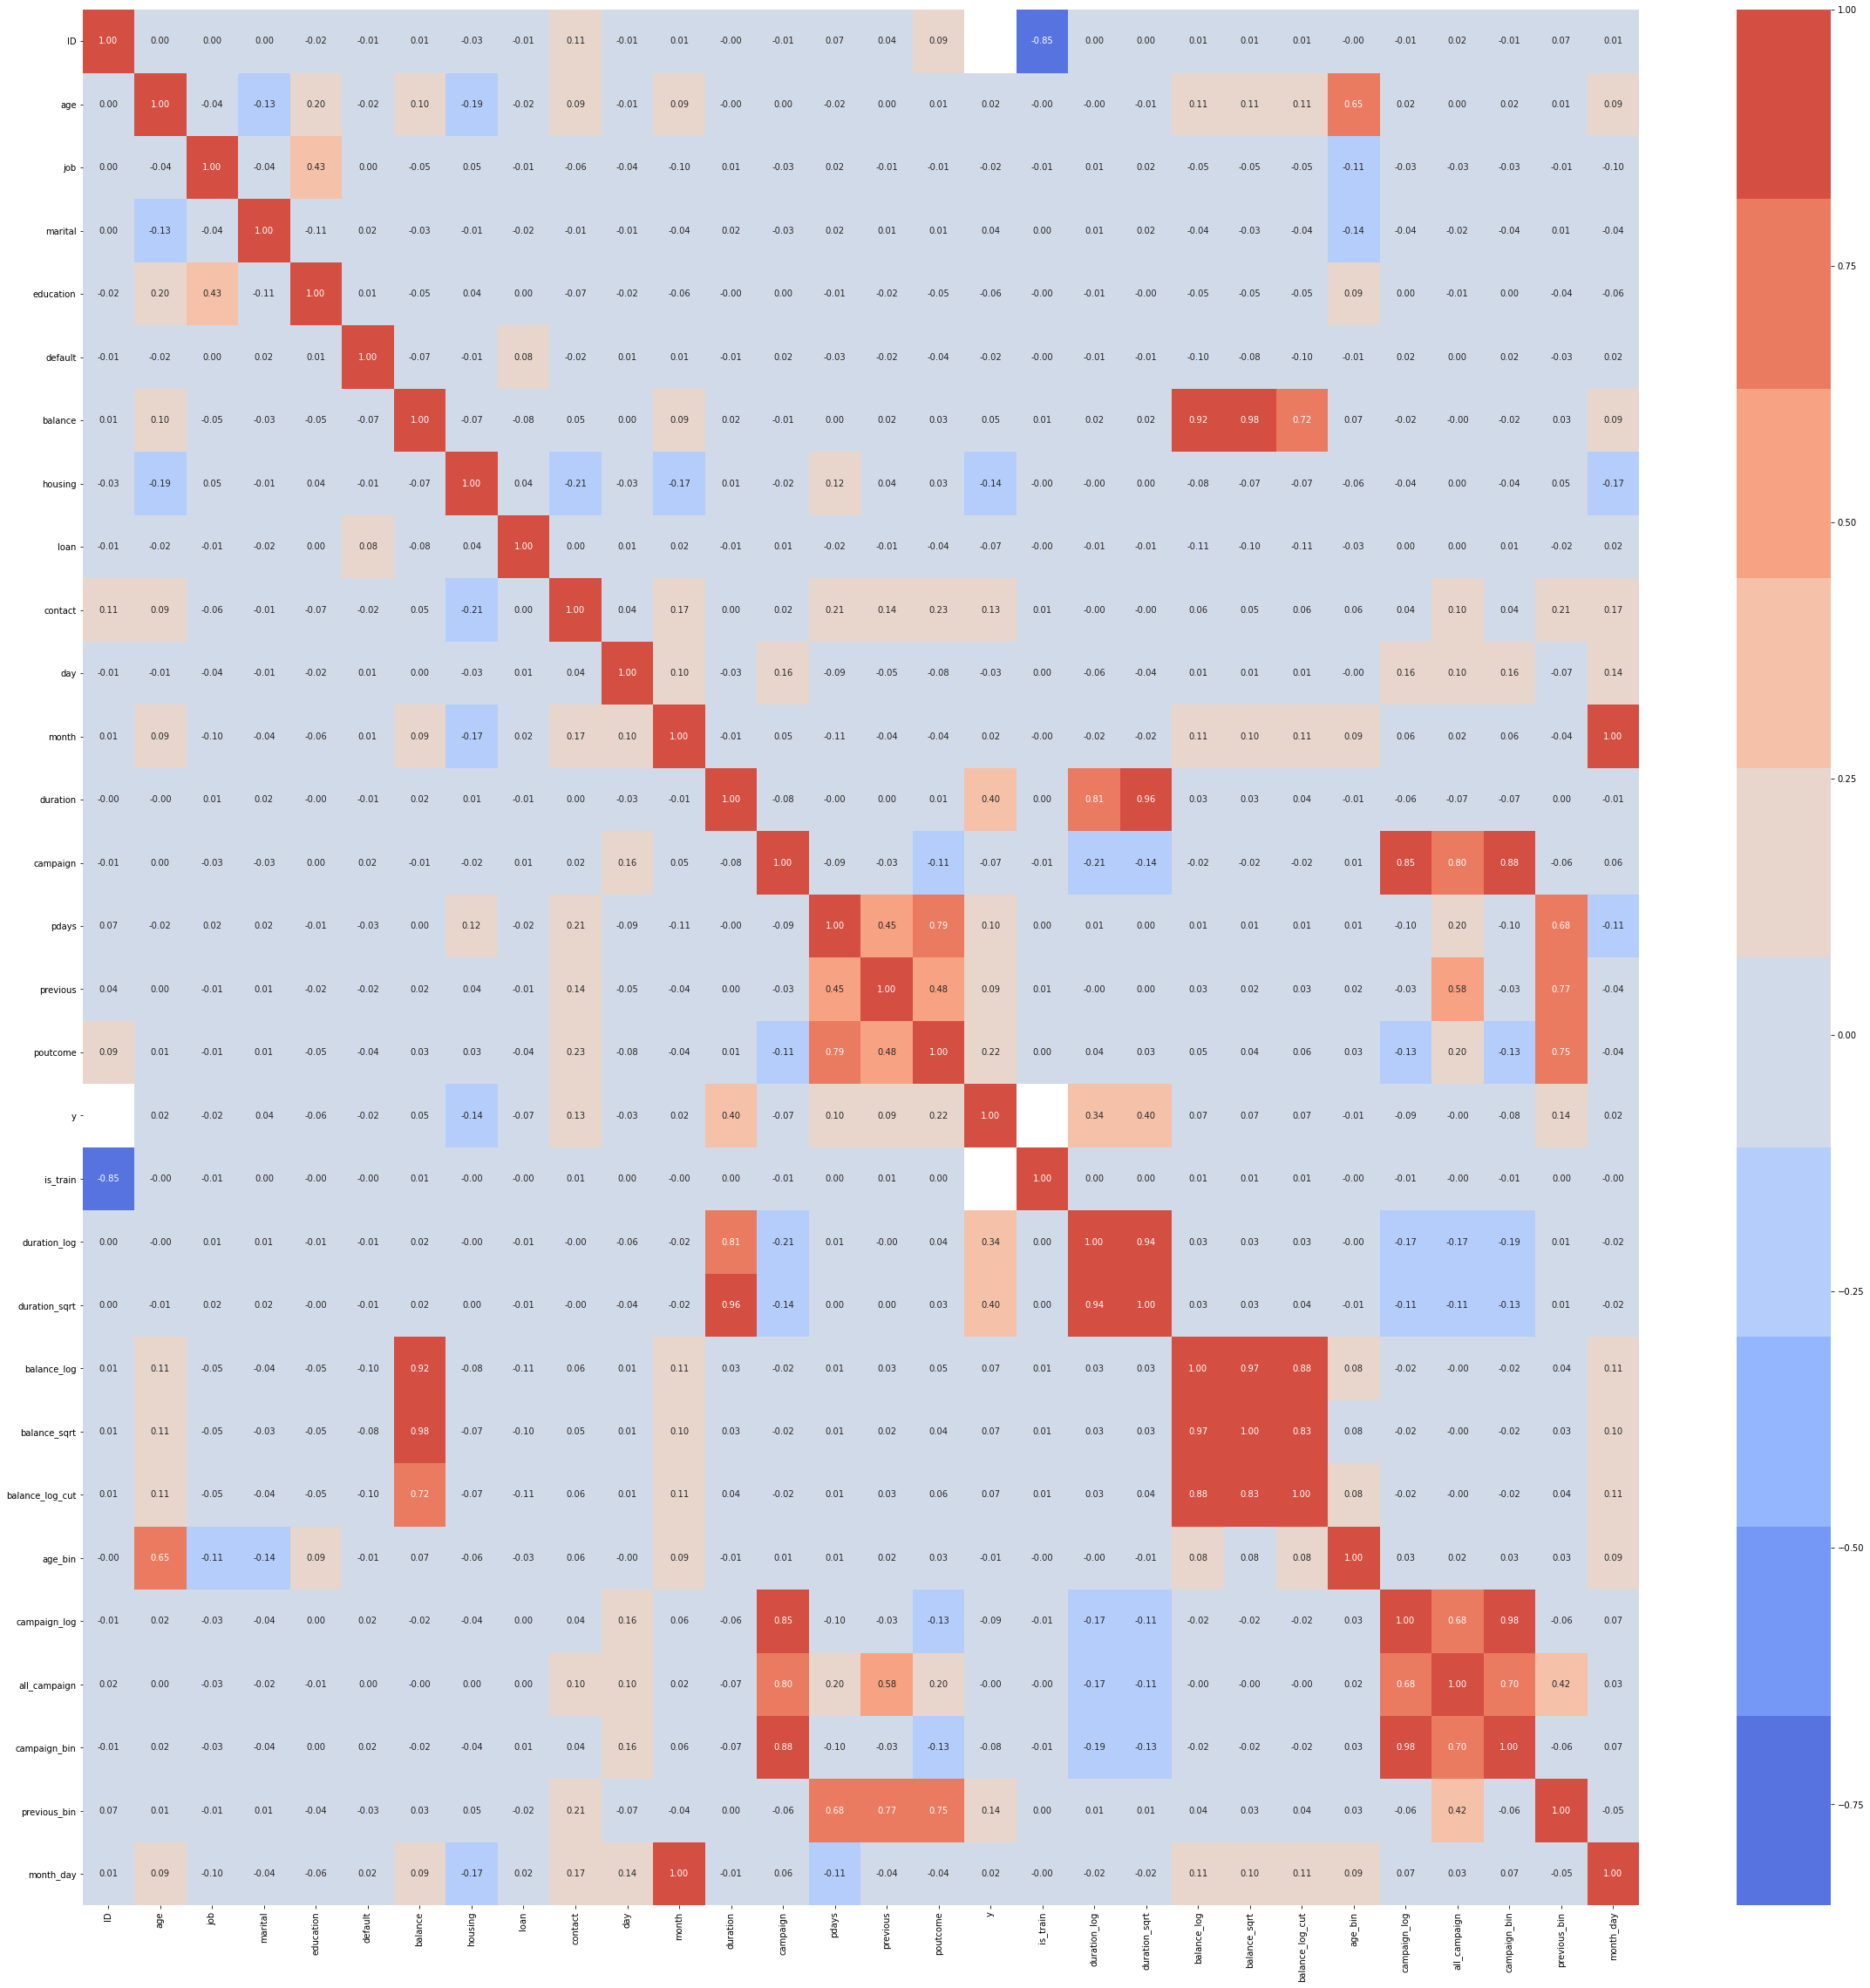

In [7]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f')


# numerical　dataのチェック


## age, age_bin


<Figure size 1440x720 with 0 Axes>

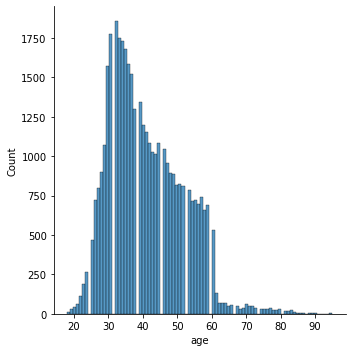

In [7]:
plt.figure(figsize=(20, 10))
sns.displot(df_train['age'])

<AxesSubplot:xlabel='y', ylabel='age'>

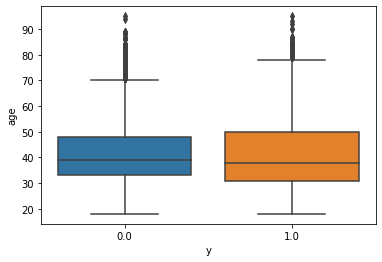

In [44]:
df_train["y"] = df_train.y.astype(object)
sns.boxplot(x = df_train["y"], y = df_train["age"])

<AxesSubplot:xlabel='age_bin', ylabel='count'>

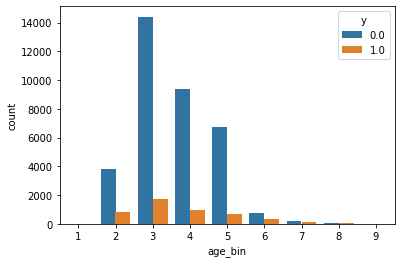

In [30]:
sns.countplot(x = df_train["age_bin"], hue = df_train["y"])

<AxesSubplot:xlabel='age_bin', ylabel='y'>

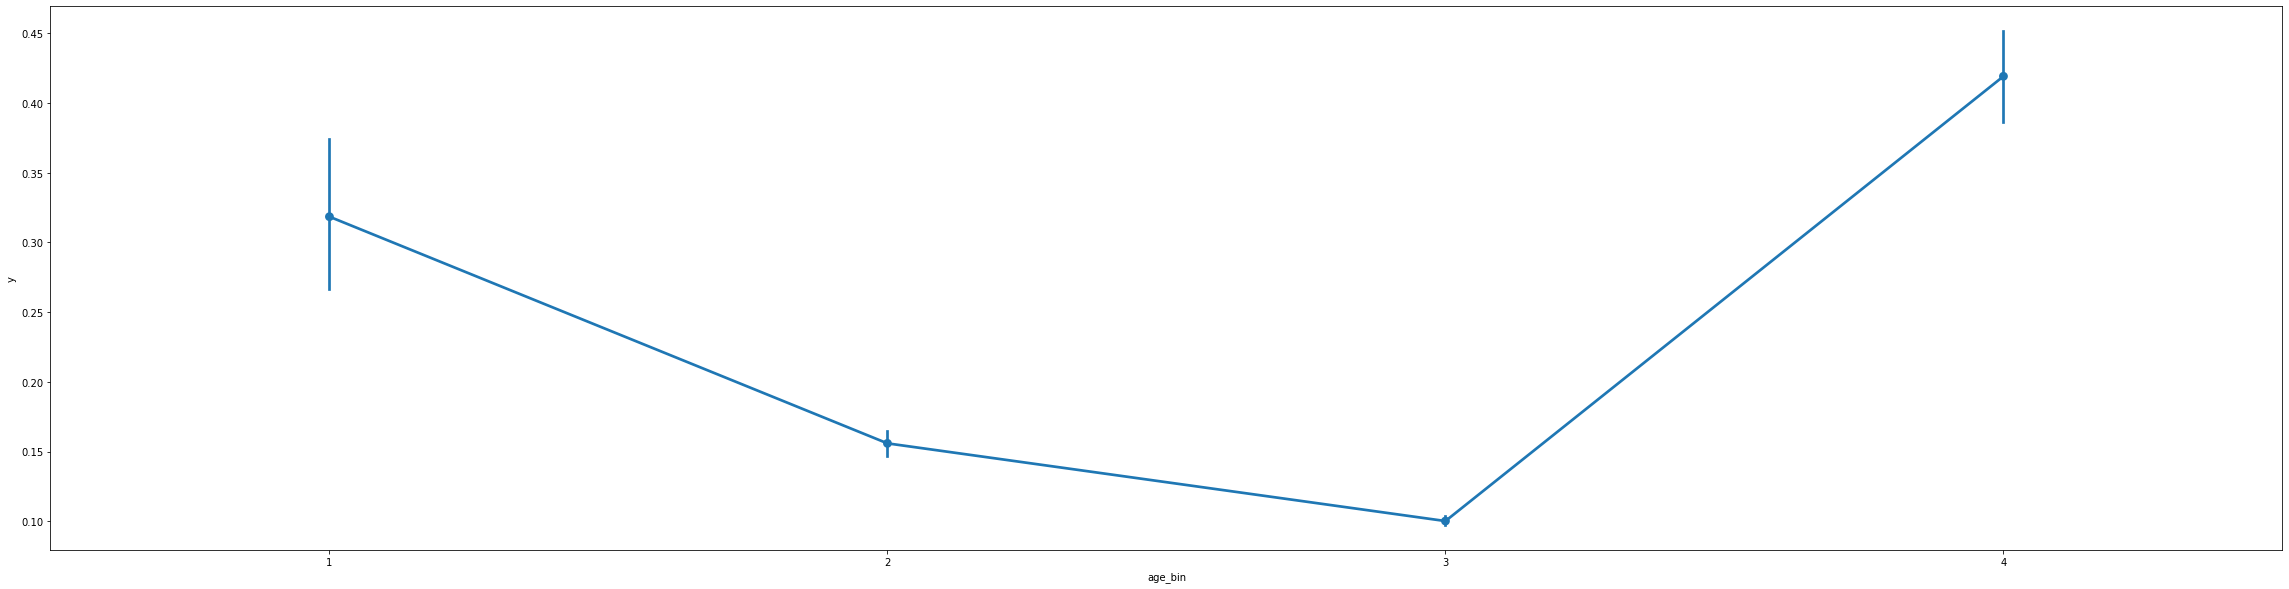

In [65]:
plt.figure(figsize=(40, 10))
sns.pointplot(x = "age_bin", y = "y", data = df_train)
# binningの仕方を変えるべき 18~22, 23~30, 31~61, 62以降全部 

## duration
話をした時間
- log取ったらいい感じに見やすい。綺麗なガウス
- ハコひげ図的に、yesの方が明らかに時間が長い。
- 他との相関とか取れそう？

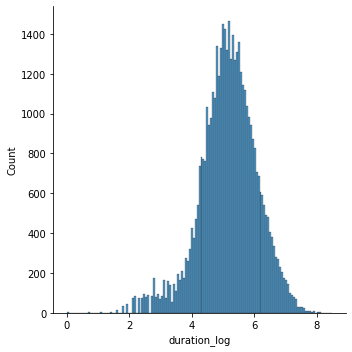

In [12]:
sns.displot(df['duration_log'])

<AxesSubplot:xlabel='y', ylabel='duration_log'>

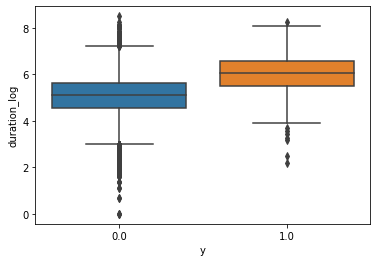

In [47]:
sns.boxplot(x = df_train["y"], y = df_train["duration_log"])

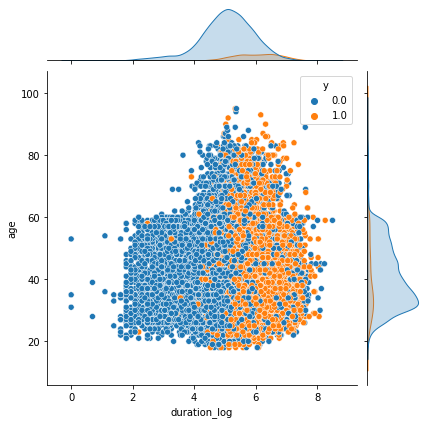

In [34]:
sns.jointplot(x = "duration_log", y="age", hue = "y", data = df_train)
# 決定木でできそう

## balance

分散が大きすぎる
10000と-8000とかがあるので最頻値と平均が全く一致していない
-100~20000あたりとそれ以外で扱い変えてもいいかも

In [17]:

#df["balance_log_cut"] = df.balance_log_cut.map(lambda x: x-1)
df.balance_log_cut.describe()

count    45211.000000
mean         1.118653
std          0.212975
min         -8.000000
25%          0.998631
50%          1.044050
75%          1.153558
max          3.609571
Name: balance_log_cut, dtype: float64

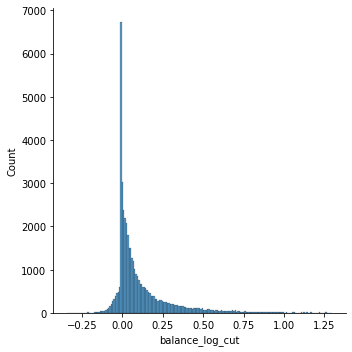

In [24]:
sns.displot(df['balance_log_cut'])

<AxesSubplot:xlabel='y', ylabel='balance_log_cut'>

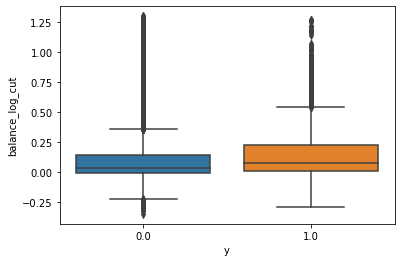

In [45]:
sns.boxplot(x = df_train["y"], y = df_train["balance_log_cut"])

In [6]:
#ハズレ値っぽいやつの検出=> 162
# 除外するか、one_hotで与えるか
df[(df['balance_log'] == 0)]

,Unnamed: 0,ID,age,job,marital,education,default,balance,housing,loan,...,pdays,previous,poutcome,y,is_train,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
11418,11418,-1,26,8,2,2,1,1,0,1,...,-1,0,1,0.0,True,5.703782,17.320508,0.0,1.0,-8.0


上振れと下振れの外れ値の観察
大きいものに関しては、明らかにyが大きい。

In [7]:
df_train[df_train["balance_log"]<8.6].describe()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,8.000000,8.0,8.0,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,18757.75000,45.750000,4.875000,1.500000,1.500000,0.625000,4274.750000,0.875000,0.625000,1.75000,...,2.250000,-1.0,0.0,1.0,0.125000,5.776735,18.956698,7.428059,61.211203,-0.571941
std,11660.31467,11.055057,3.907411,0.755929,1.069045,0.517549,1787.809334,0.353553,0.517549,0.46291,...,1.752549,0.0,0.0,0.0,0.353553,0.689032,6.898744,3.003030,24.563356,3.003030
min,1693.00000,26.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,...,1.000000,-1.0,0.0,1.0,0.000000,4.962845,11.958261,0.000000,1.000000,-8.000000
25%,10211.50000,39.750000,1.000000,1.000000,1.000000,0.000000,4476.750000,1.000000,0.000000,1.75000,...,1.000000,-1.0,0.0,1.0,0.000000,5.379034,14.793761,8.404333,66.870272,0.404333
50%,19360.50000,46.000000,5.000000,1.000000,1.000000,1.000000,4834.500000,1.000000,1.000000,2.00000,...,1.500000,-1.0,0.0,1.0,0.000000,5.620558,16.628943,8.483185,69.524522,0.483185
75%,28307.75000,53.250000,8.250000,2.000000,1.250000,1.000000,5221.750000,1.000000,1.000000,2.00000,...,3.000000,-1.0,0.0,1.0,0.000000,6.153357,22.017156,8.560543,72.260860,0.560543
max,34489.00000,60.000000,9.000000,3.000000,4.000000,1.000000,5416.000000,1.000000,1.000000,2.00000,...,6.000000,-1.0,0.0,1.0,1.000000,6.783325,29.715316,8.597113,73.593478,0.597113


In [8]:
df_train[df_train["balance_log"]>10.3].describe()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.0,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,22919.77037,47.029630,3.851852,1.466667,1.622222,0.0,41003.244444,0.288889,0.044444,1.903704,...,2.711111,34.970370,0.570370,1.377778,0.177778,5.145228,14.392244,10.574412,199.960289,2.574412
std,11416.77454,12.631955,3.249612,0.710266,0.929345,0.0,14849.536912,0.454934,0.206848,0.558170,...,3.268727,94.444641,1.458586,0.836363,0.383750,0.885098,6.408685,0.285830,32.042668,0.285830
min,300.00000,24.000000,1.000000,1.000000,1.000000,0.0,29874.000000,0.000000,0.000000,1.000000,...,1.000000,-1.000000,0.000000,1.000000,0.000000,2.197225,3.000000,10.304744,172.840967,2.304744
25%,15161.00000,37.000000,1.000000,1.000000,1.000000,0.0,31891.500000,0.000000,0.000000,2.000000,...,1.000000,-1.000000,0.000000,1.000000,0.000000,4.499748,9.486687,10.370095,178.581914,2.370095
50%,23398.00000,46.000000,2.000000,1.000000,1.000000,0.0,35379.000000,0.000000,0.000000,2.000000,...,2.000000,-1.000000,0.000000,1.000000,0.000000,5.220356,13.601471,10.473874,188.093062,2.473874
75%,34955.50000,56.000000,6.000000,2.000000,2.000000,0.0,43925.000000,1.000000,0.000000,2.000000,...,3.000000,-1.000000,0.000000,1.000000,0.000000,5.700393,17.291399,10.690213,209.581563,2.690213
max,39905.00000,84.000000,12.000000,3.000000,4.000000,0.0,110147.000000,1.000000,1.000000,3.000000,...,31.000000,589.000000,9.000000,4.000000,1.000000,7.392648,40.298883,11.609571,331.884016,3.609571


In [11]:
df_test[df_test["balance_log"]>10.3]

,Unnamed: 0,ID,age,job,marital,education,default,balance,housing,loan,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
40462,251,2344,26,2,2,2,0,32319,1,0,...,1,-1,0,1,NaN,6.558198,26.551836,10.383411,179.774859,2.383411
40495,284,2620,44,7,1,2,0,37332,0,0,...,1,-1,0,1,NaN,5.424950,15.066519,10.527606,193.214906,2.527606
40516,305,2779,45,1,1,1,0,45398,1,0,...,1,-1,0,1,NaN,5.123964,12.961481,10.723223,213.068064,2.723223
40759,548,5008,32,8,1,4,0,37070,1,1,...,2,-1,0,1,NaN,6.335054,23.748684,10.520563,192.535711,2.520563
40785,574,5134,31,1,2,1,0,32890,1,0,...,2,-1,0,1,NaN,6.453625,25.199206,10.400924,181.356003,2.400924
41013,802,7230,52,2,1,2,0,30775,1,0,...,2,-1,0,1,NaN,4.262680,8.426150,10.334458,175.428048,2.334458
42631,2420,21193,52,8,1,4,0,74673,0,0,...,3,-1,0,1,NaN,4.700480,10.488088,11.220874,273.263609,3.220874
42793,2582,22766,55,1,2,1,0,51094,1,0,...,6,-1,0,1,NaN,4.532599,9.643651,10.841422,226.039820,2.841422
42939,2728,24054,47,6,1,2,0,32576,0,0,...,1,-1,0,1,NaN,5.736572,17.606817,10.391331,180.488227,2.391331
42943,2732,24070,58,1,3,1,0,34274,1,0,...,1,-1,0,1,NaN,3.912023,7.071068,10.442142,185.132385,2.442142


## campaign, previous

アタックした回数  
- 左に沿ってるグラフなのでlog? => categoricalっぽいので失敗
- 少ないほどいい
- campaign-y previous-poutcomeはついになっている
- all_campaignはpreviousとcampaignの和。
- 大きくなるほど過学習しそう。分散が大きいっぽいので
- previousとcampaignは違う傾向を持つ。
- binにしたら綺麗な傾向が出たので採用。幅は要修正（特にprevious）
1~10まではそのまま。それ以降は10か20単位あたりでまとめる。

In [12]:
print(np.mean(df[(df.poutcome==3)&(df.y == 1)].all_campaign))
print(np.mean(df[(df.poutcome==3)&(df.y == 0)].all_campaign))
print(np.mean(df[(df.poutcome==4)&(df.y == 1)].all_campaign))
print(np.mean(df[(df.poutcome==4)&(df.y == 0)].all_campaign))

4.848816029143898
4.881219067465485
4.817341040462428
4.901075268817205


In [13]:
print(np.mean(df[(df.poutcome==3)&(df.y == 1)].campaign))
print(np.mean(df[(df.poutcome==3)&(df.y == 0)].campaign))
print(np.mean(df[(df.poutcome==4)&(df.y == 1)].campaign))
print(np.mean(df[(df.poutcome==4)&(df.y == 0)].campaign))

1.7395264116575593
2.0109403490492315
1.715606936416185
1.939784946236559


In [91]:
df_train["y"] = df_train.y.astype(int)
percent_campaign = pd.DataFrame(df.groupby("campaign").y.mean())
df_train["y"] = df_train.y.astype(object)

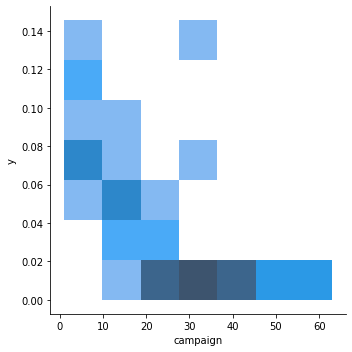

In [96]:
sns.displot(x = "campaign", y = "y", data = percent_campaign)


<AxesSubplot:xlabel='campaign_bin', ylabel='y'>

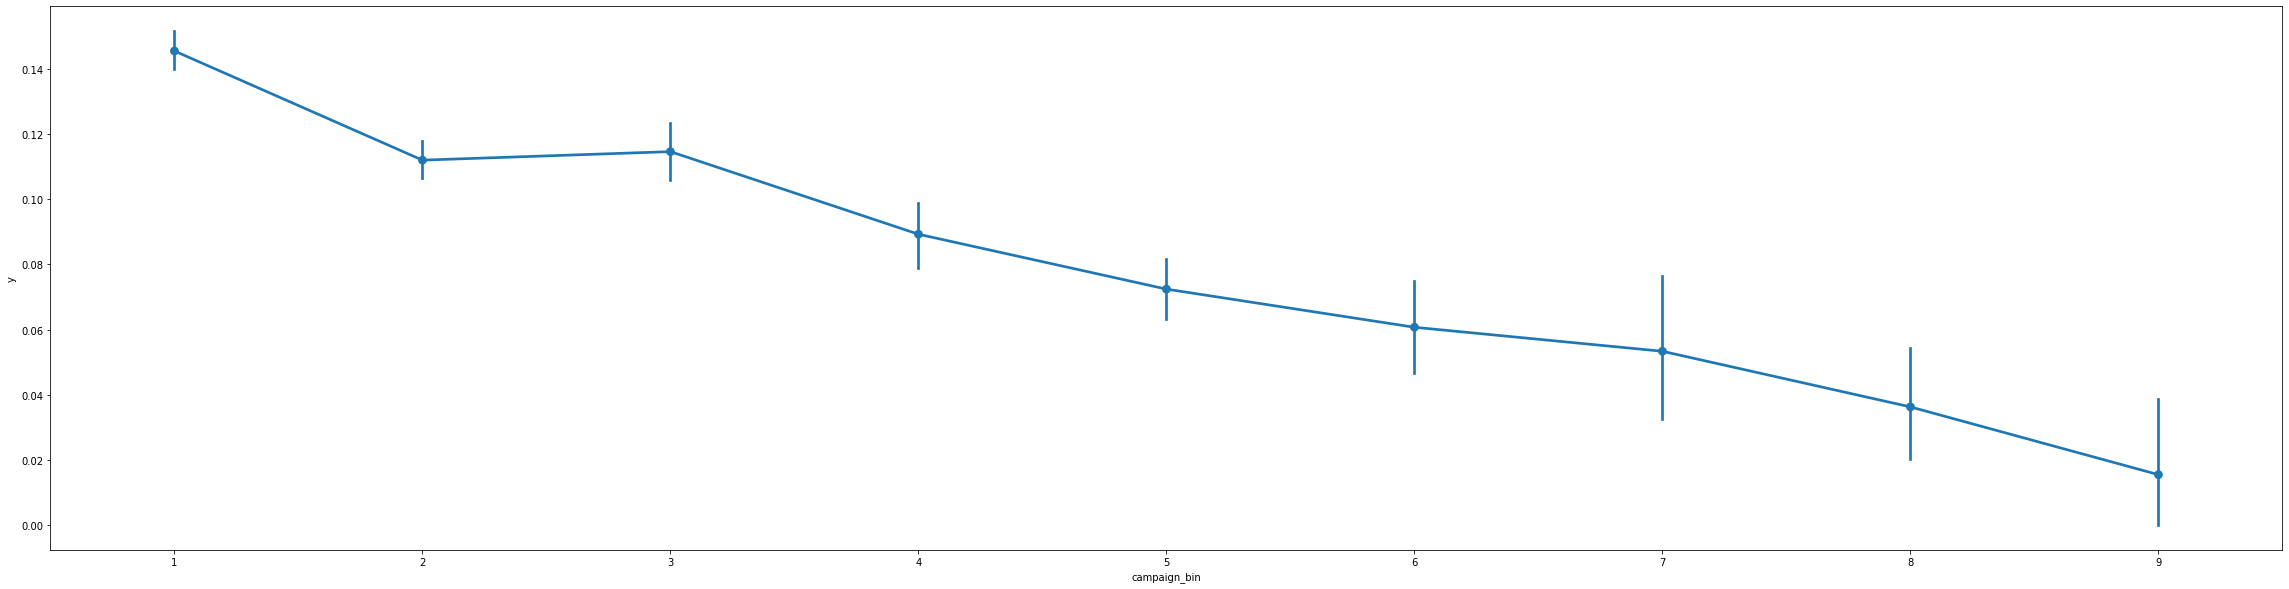

In [26]:
plt.figure(figsize=(40, 10))
sns.pointplot(x = "campaign_bin", y = "y", data = df_train)
# 1~4(1),5~13(3) 14~24(10), 25~ 4+3+1+1=> 9つに分類

<AxesSubplot:xlabel='previous_bin', ylabel='y'>

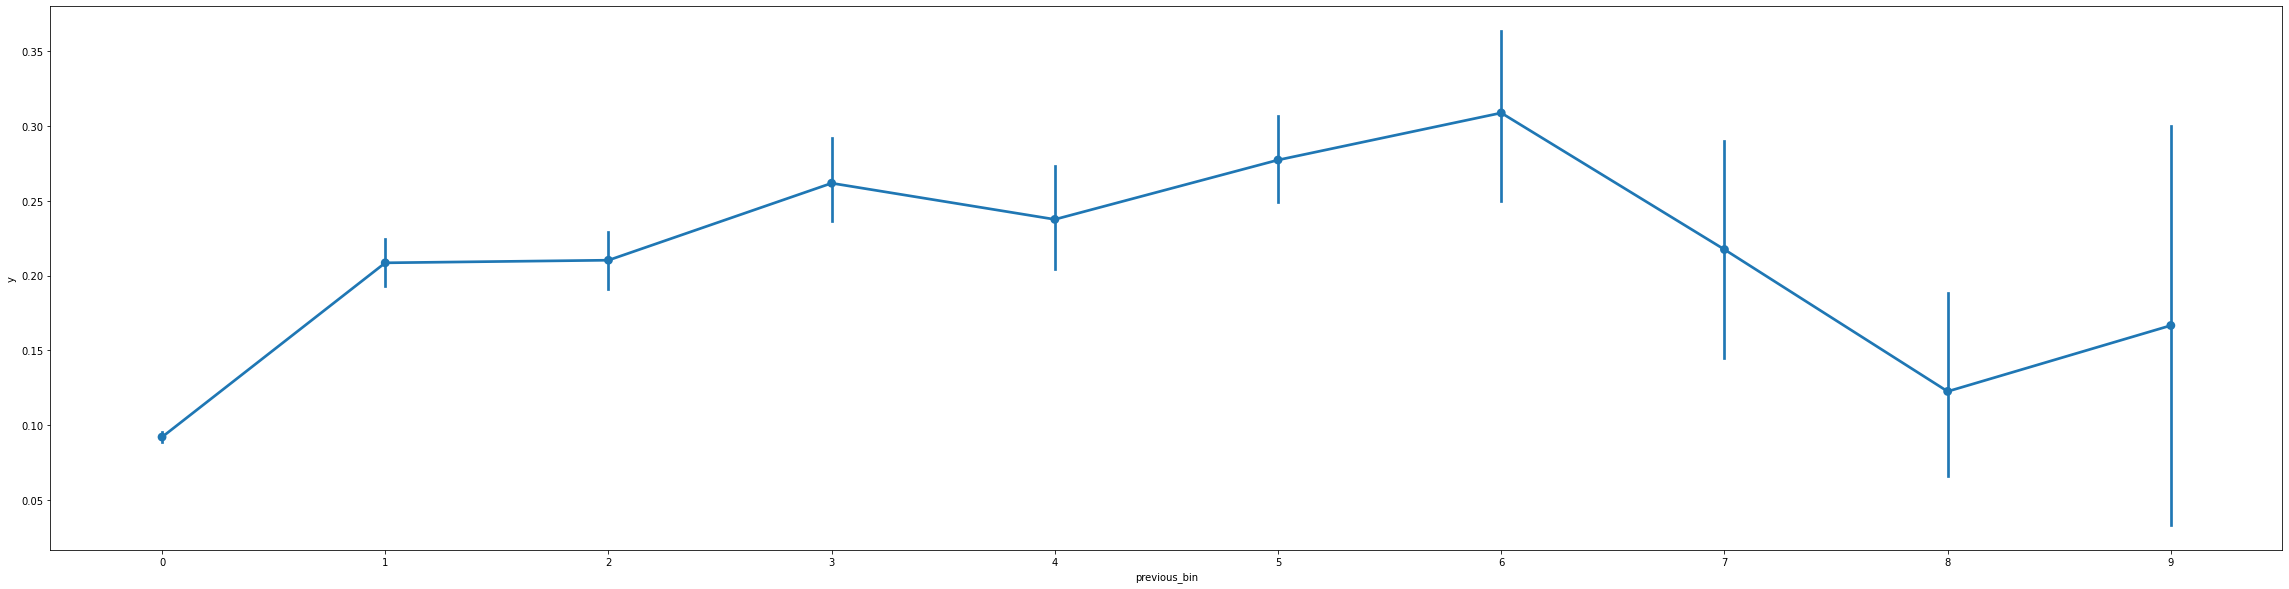

In [29]:
plt.figure(figsize=(40, 10))
sns.pointplot(x = "previous_bin", y = "y", data = df_train)
# 0~4(1),5~13(3) 14~24(10), 25~ 5+3+1+1=> 10つに分類

<AxesSubplot:xlabel='all_campaign', ylabel='y'>

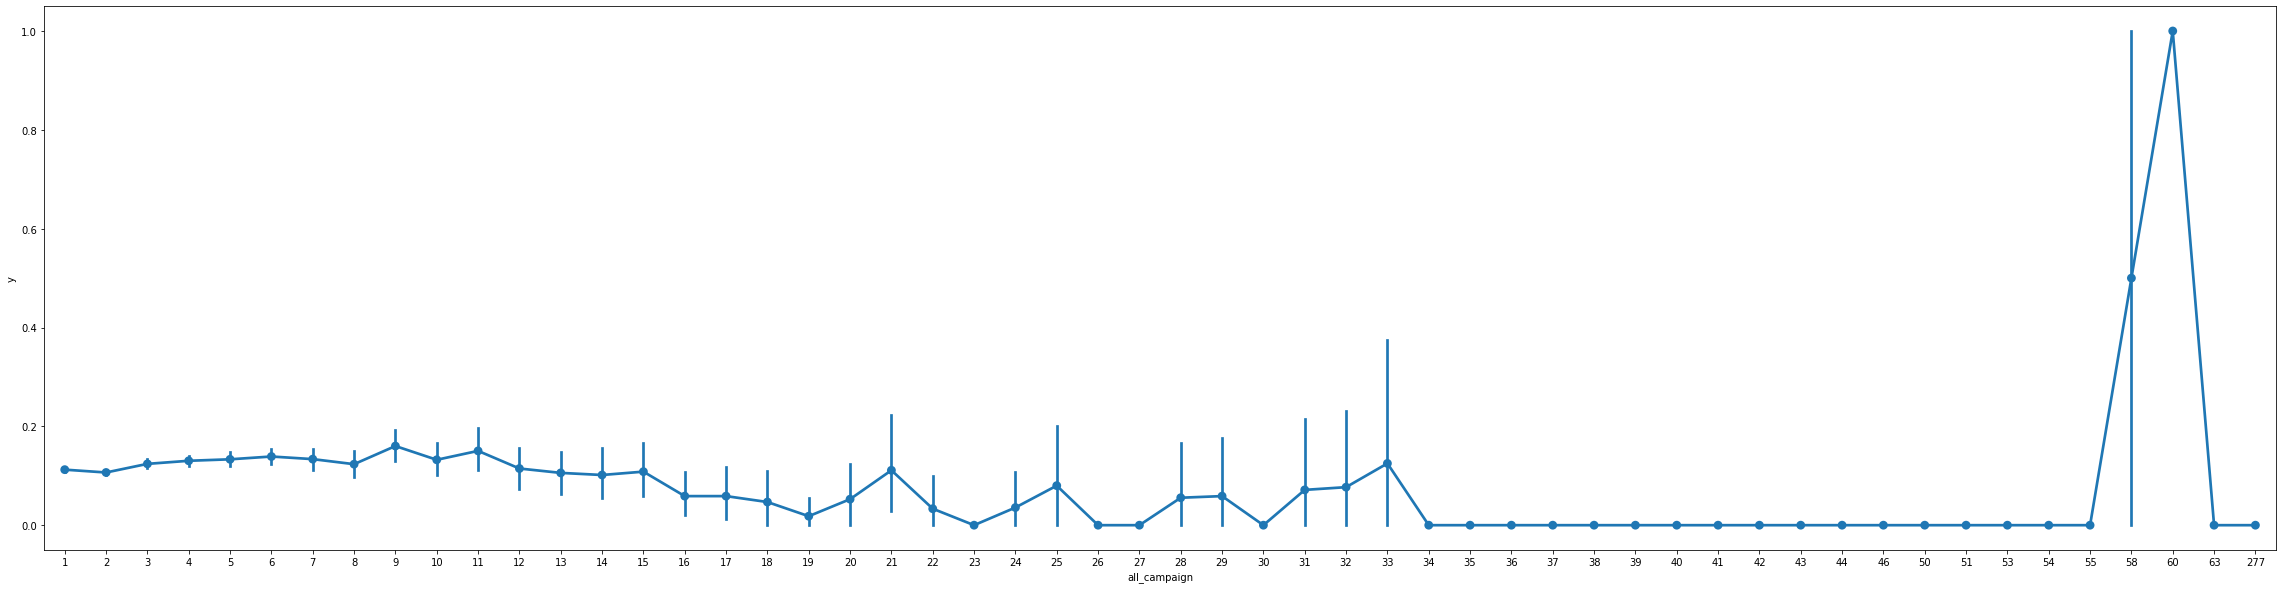

In [22]:
plt.figure(figsize=(40, 10))
sns.pointplot(x = "all_campaign", y = "y", data = df_train)

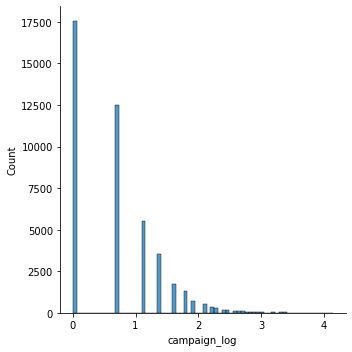

In [68]:
sns.displot(df['campaign_log'])

<AxesSubplot:xlabel='y', ylabel='campaign_log'>

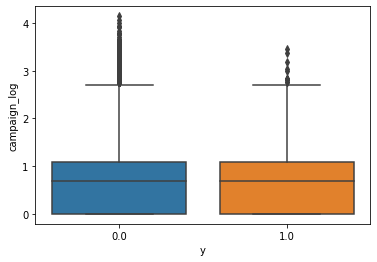

In [69]:
sns.boxplot(x = df_train["y"], y = df_train["campaign_log"])

# categorical dataのチェック

## marital

結婚しているかどうか
1. maried
2. single
3. divorced
- hoo
- bar

<AxesSubplot:xlabel='marital', ylabel='count'>

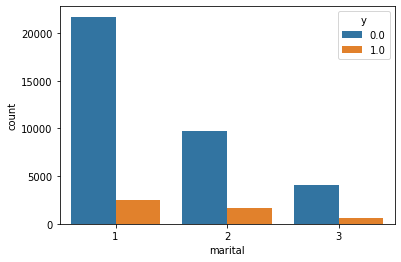

In [32]:
sns.countplot(x = df_train["marital"], hue = df_train["y"])

## job

仕事のデータ
1. management. 
2. technician. 
3. entrepreneur
4. unknown(あんま意味ない）
5. retired
6. admin
7. services
8. blue-collar
9. self-employed
10. housemaid
11. unemployed
12. student

<AxesSubplot:xlabel='job', ylabel='age'>

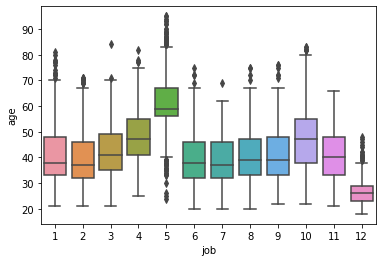

In [14]:
sns.boxplot(x = "job", y = "age", data = df)

<AxesSubplot:xlabel='job', ylabel='age'>

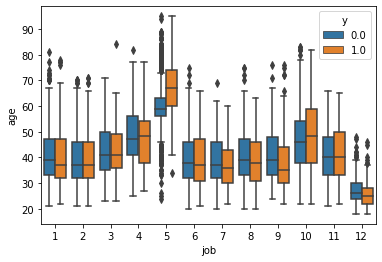

In [51]:
sns.boxplot(x = "job", y = "age", hue = "y", data = df_train)

<AxesSubplot:xlabel='job', ylabel='count'>

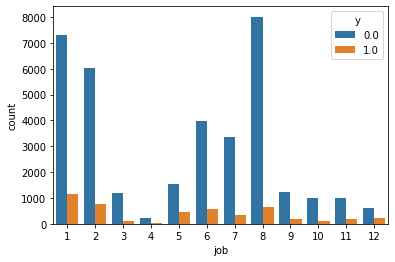

In [53]:
sns.countplot(x = "job", hue = "y", data = df_train)

<AxesSubplot:xlabel='job', ylabel='y'>

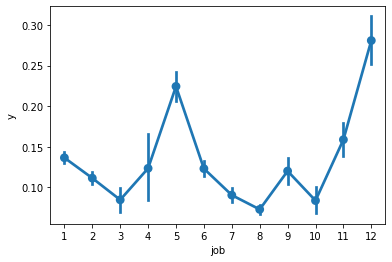

In [106]:
df_train["y"] = df_train.y.astype(int)
#percent_job = pd.DataFrame(df.groupby("job").y.mean())
df_train["y"] = df_train.y.astype(object)
sns.pointplot(x = "job", y = "y", data = df_train)

1(management), 5(retired), 11(unemployed), 12(student)は優位に値が高い

## education

1. teritary
2. secondary
3. unknown
4. primary

<AxesSubplot:xlabel='education', ylabel='count'>

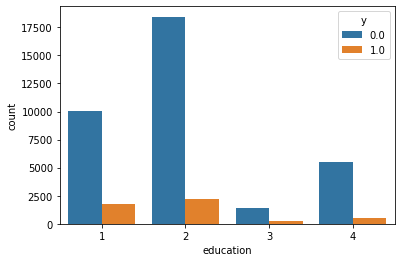

In [54]:
sns.countplot(x = "education", hue = "y", data = df_train)

<AxesSubplot:xlabel='education', ylabel='age'>

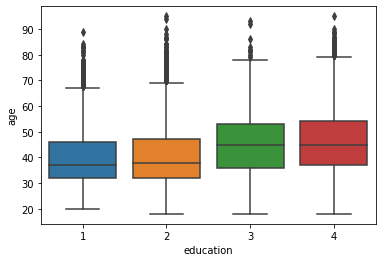

In [59]:
sns.boxplot(x = "education", y = "age", data = df_train)

<AxesSubplot:xlabel='education', ylabel='y'>

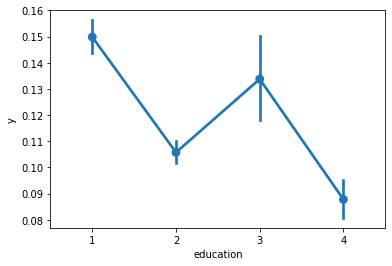

In [108]:
sns.pointplot(x = "education", y = "y", data = df_train)

## default

https://ja.wikipedia.org/wiki/%E3%83%87%E3%83%95%E3%82%A9%E3%83%AB%E3%83%88_(%E9%87%91%E8%9E%8D)
借金返してないやべえやつ
1. no
2. yes

<AxesSubplot:xlabel='default', ylabel='count'>

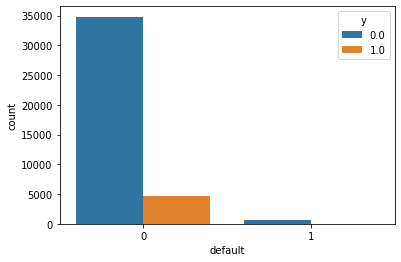

In [60]:
sns.countplot(x = "default", hue = "y", data = df_train)

## poutcome(過去の結果）

outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
1. unknown
2. other
3. failuer
4. success

できることなさそう。  
強いてやるなら、successとfailuerの人の特徴を観察するとか？  
successでno, failuerでyesの人を見ても面白そう
分散が小さいのでそのままでおk
unknownはたまたま収束してるだけな気がするので、poutcome_success, poutcome_other,
を作ってもいいかもしれない？

In [42]:
print("success percent")
print(len(df[df.poutcome == 4])/len(df))
print("それぞれの情報")
df.groupby("poutcome").y.describe()

success percent
0.0334210700935613
それぞれの情報


,count,mean,std,min,25%,50%,75%,max
poutcome,,,,,,,,
1,32855.0,0.092223,0.289345,0.0,0.0,0.0,0.0,1.0
2,1638.0,0.163614,0.370038,0.0,0.0,0.0,0.0,1.0
3,4388.0,0.125114,0.330886,0.0,0.0,0.0,0.0,1.0
4,1330.0,0.650376,0.477031,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='poutcome', ylabel='count'>

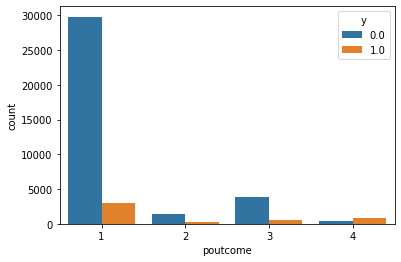

In [41]:
sns.countplot(x = df_train["poutcome"], hue = df_train["y"])

<AxesSubplot:xlabel='poutcome', ylabel='y'>

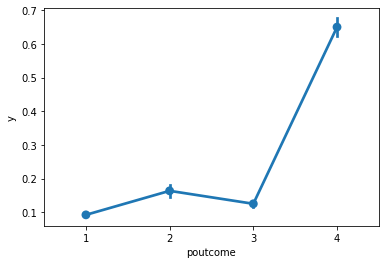

In [111]:
sns.pointplot(x = "poutcome", y = "y", data = df_train)

## month_day

毎年のトレンドは同じだと予想。
monthとdayを結びつけたいので結合して使用。
- 二つ目の図より明らかにトレンドがありそう。
- 5,6,7月にも盛り上がっている箇所があるのでmonth-dayの方が良さげ？

<AxesSubplot:xlabel='month', ylabel='y'>

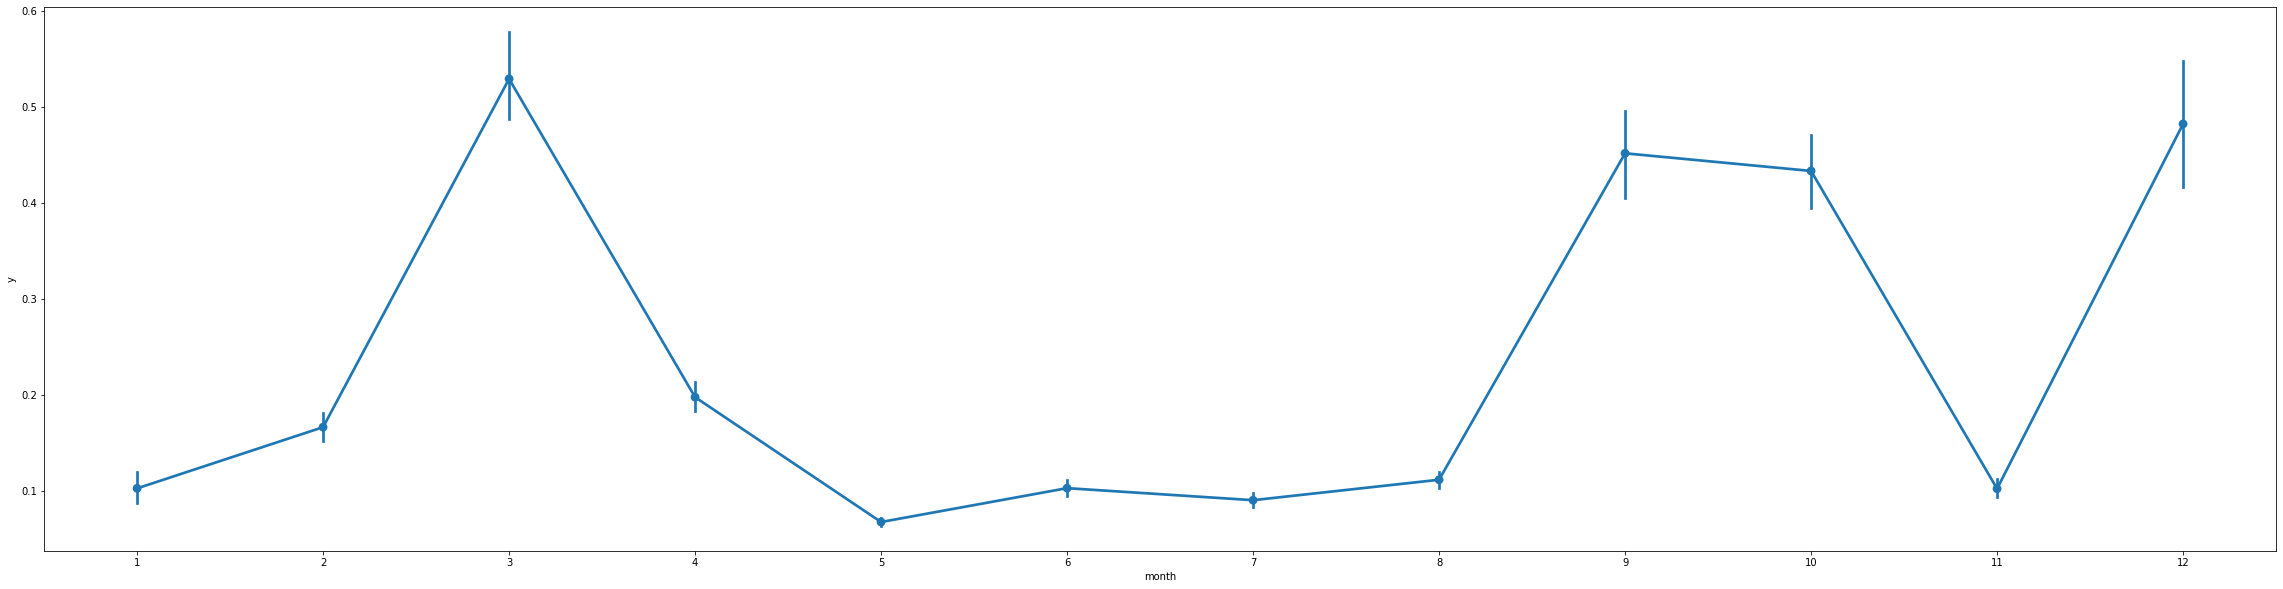

In [74]:
plt.figure(figsize=(40, 10))
sns.pointplot(x ="month",y = "y", data = df_train)

<AxesSubplot:xlabel='month_day', ylabel='y'>

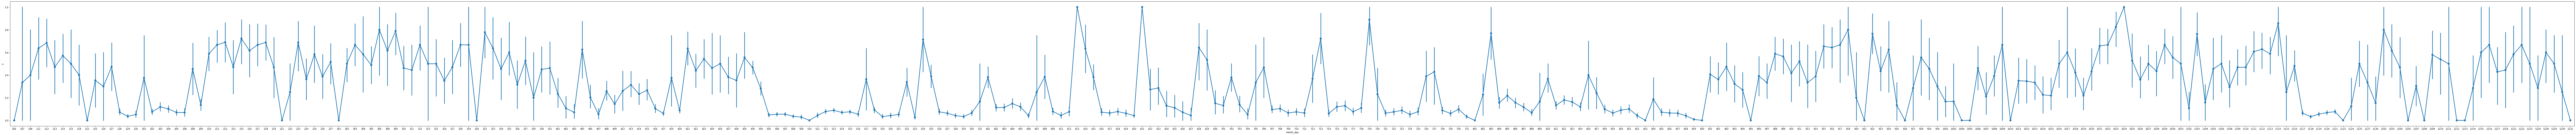

In [79]:
plt.figure(figsize=(200, 10))
sns.pointplot(x ="month_day",y = "y", data = df_train)

# 欠損値処理

job education contact poutcomeのunknownをそれ以外で埋める。
モデルは安直にrondomforest